<a href="https://colab.research.google.com/github/RichardMWarburton/ExploringCUAD/blob/main/JOGLE_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOGLE Analysis

Analysis of GPX files generated during a John O'Groats to Land's End cycle ride

## Section 0: Workbook Set Up

In [1]:
#Install packages not in CoLab environment
!pip install gpxpy

     |████████████████████████████████| 112kB 3.9MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.4.2-cp37-none-any.whl size=42565 sha256=78a8ed9558db64fd2ad073fbdc20e02bf57db5e30374845df364ef9f512db85a
  Stored in directory: /root/.cache/pip/wheels/d9/df/ed/b52985999b3967fa0ef8de22b3dc8ad3494ce3380d5328dd0f
Successfully built gpxpy


In [25]:
#Immport packages for the analysis
import gpxpy
import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

## Section 1: Import Data

In [3]:
#Download JOGLE git repository if main.zip is not found
if not os.path.exists('GPX_data.zip'):
  !wget --no-check-certificate https://github.com/RichardMWarburton/JOGLE/raw/main/GPX_data.zip
  !unzip -q GPX_data.zip

--2021-07-12 16:43:42--  https://github.com/RichardMWarburton/JOGLE/raw/main/GPX_data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RichardMWarburton/JOGLE/main/GPX_data.zip [following]
--2021-07-12 16:43:42--  https://raw.githubusercontent.com/RichardMWarburton/JOGLE/main/GPX_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4487894 (4.3M) [application/zip]
Saving to: ‘GPX_data.zip’

GPX_data.zip        100%[===================>]   4.28M  --.-KB/s    in 0.1s    

2021-07-12 16:43:43 (32.6 MB/s) - ‘GPX_data.zip’ saved [4487894/4487894]



In [13]:
# List GPX files in data
gpx_files = os.listdir('GPX_data/')

In [23]:
#Initate Data Frame for storing
gpx_dict = {'lon':[], 'lat':[], 'alt':[], 'time':[]}

#for each gpx file, load the data and add to overall file
for fl in gpx_files:
  print('Processing:',fl)

  gpx_file = open('GPX_data/' + fl, 'r')
  gpx = gpxpy.parse(gpx_file)
  
  data = gpx.tracks[0].segments[0].points

  for point in data:
    gpx_dict['lon'].append(point.longitude)
    gpx_dict['lat'].append(point.latitude)
    gpx_dict['alt'].append(point.elevation)
    gpx_dict['time'].append(point.time)
  
print('Processing complete')

#gpx_df = pd.DataFrame(gpx_dict)

Processing: Day_5_aborted.gpx
Processing: JOGLE_Day_7.gpx
Processing: JOGLE_Day_8.gpx
Processing: JOGLE_Day_1.gpx
Processing: JOGLE_Day_13.gpx
Processing: JOGLE_Day_2.gpx
Processing: JOGLE_Day_15.gpx
Processing: JOGLE_Day_4.gpx
Processing: JOGLE_Day_6.gpx
Processing: JOGLE_Day_10.gpx
Processing: JOGLE_Day_16.gpx
Processing: JOGLE_Day_11.gpx
Processing: JOGLE_Day_5.gpx
Processing: JOGLE_Day_12_.gpx
Processing: JOGLE_Day_14.gpx
Processing: JOGLE_Day_3.gpx
Processing: JOGLE_Day_9.gpx


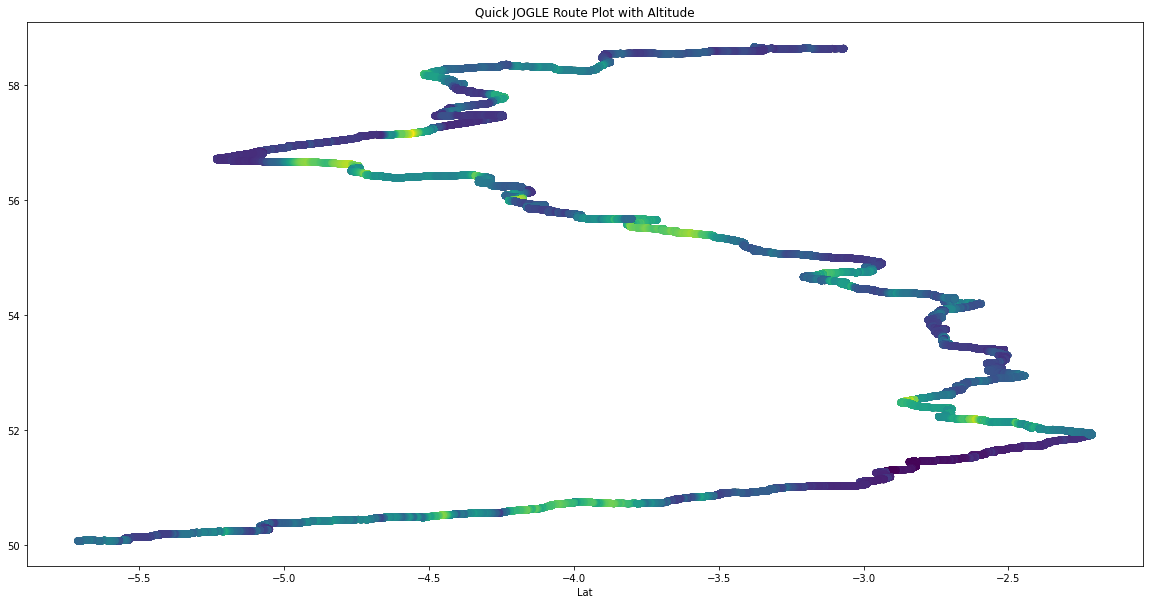

In [36]:
plt.figure(figsize = (20,10))
plt.scatter(gpx_dict['lon'],gpx_dict['lat'], c = gpx_dict['alt'])
plt.title('Quick JOGLE Route Plot With Altitude')
plt.xlabel('Lon')
plt.xlabel('Lat')
plt.show()

In [37]:
max(gpx_dict['alt'])

385.6